## Question 1: Building the graph and loading the data

In [54]:
from graph import Graph



currentGraph = Graph()


# adding the nodes (reading from a file)

with open('romania.txt', 'r') as file:
    while True:
        line = file.readline()
        if (line == ""):
            break
        # we use 4 spaces to separate the cities and numbers
        unpacked = line.split(sep="    ")
        city, lat, long = unpacked
        currentGraph.addNode(city)



# adding the edges (manually)

currentGraph.addUndirectedEdge("Oradea","Sibiu", 151, 151)
currentGraph.addUndirectedEdge("Oradea","Zerind", 71, 71)
currentGraph.addUndirectedEdge("Zerind","Arad", 75, 75)
currentGraph.addUndirectedEdge("Arad","Sibiu", 140, 140)
currentGraph.addUndirectedEdge("Arad","Timisoara", 118, 118)
currentGraph.addUndirectedEdge("Timisoara","Lugoj", 111, 111)
currentGraph.addUndirectedEdge("Lugoj","Mehadia", 70, 70)
currentGraph.addUndirectedEdge("Mehadia","Drobeta", 75, 75)
currentGraph.addUndirectedEdge("Craiova","Drobeta", 120, 120)
currentGraph.addUndirectedEdge("Craiova","Rimnicu Vilcea", 146, 146)
currentGraph.addUndirectedEdge("Giurgiu","Bucharest", 90, 90)
currentGraph.addUndirectedEdge("Bucharest","Pitesti", 101, 101)
currentGraph.addUndirectedEdge("Urziceni","Bucharest", 85, 85)
currentGraph.addUndirectedEdge("Hirsova","Eforie", 86, 86)
currentGraph.addUndirectedEdge("Hirsova","Urziceni", 98, 98)
currentGraph.addUndirectedEdge("Vaslui","Iasi", 92, 92)
currentGraph.addUndirectedEdge("Vaslui","Urziceni", 142, 142)
currentGraph.addUndirectedEdge("Neamt","Iasi", 87, 87)
currentGraph.addUndirectedEdge("Rimnicu Vilcea","Sibiu", 80, 80)
currentGraph.addUndirectedEdge("Rimnicu Vilcea","Pitesti", 97, 97)
currentGraph.addUndirectedEdge("Fagaras","Sibiu", 99, 99)
currentGraph.addUndirectedEdge("Fagaras","Bucharest", 211, 211)
currentGraph.addUndirectedEdge("Pitesti","Craiova", 138, 138)

currentGraph.show()


{'Arad': [('Zerind', 75), ('Sibiu', 140), ('Timisoara', 118)],
 'Bucharest': [('Giurgiu', 90),
               ('Pitesti', 101),
               ('Urziceni', 85),
               ('Fagaras', 211)],
 'Craiova': [('Drobeta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)],
 'Drobeta': [('Mehadia', 75), ('Craiova', 120)],
 'Eforie': [('Hirsova', 86)],
 'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
 'Giurgiu': [('Bucharest', 90)],
 'Hirsova': [('Eforie', 86), ('Urziceni', 98)],
 'Iasi': [('Vaslui', 92), ('Neamt', 87)],
 'Lugoj': [('Timisoara', 111), ('Mehadia', 70)],
 'Mehadia': [('Lugoj', 70), ('Drobeta', 75)],
 'Neamt': [('Iasi', 87)],
 'Oradea': [('Sibiu', 151), ('Zerind', 71)],
 'Pitesti': [('Bucharest', 101), ('Rimnicu Vilcea', 97), ('Craiova', 138)],
 'Rimnicu Vilcea': [('Craiova', 146), ('Sibiu', 80), ('Pitesti', 97)],
 'Sibiu': [('Oradea', 151),
           ('Arad', 140),
           ('Rimnicu Vilcea', 80),
           ('Fagaras', 99)],
 'Timisoara': [('Arad', 118), ('Lugoj', 111)],
 

#### As we can see in the above cell, the Graph library we implemented allows us to:

 1. create a node
 2. insert and delete edges and nodes
 3. search for an item in the graph
 4. loading the graph data presented on page 83rd of the textbook

The implementation of the Graph class can be found in the 'graph.py' file.
The tests for the Graph class can be found in the 'test_graph.py' file. The test code showcases a variety of operations on the graph.

In [55]:
from copy import deepcopy
copyGraph = deepcopy(currentGraph)

## Question 2: Benchmarking search algorithms on 10 randomly picked cities

In [56]:
# a function to give us a random node from a graph whenever we need it
import random
def getRandomNode(graph):
    num = random.random()
    transformed = int(num*len(graph.adjacencyList.keys()))
    return list(graph.adjacencyList.keys())[transformed]

In [57]:
# we'll be using this context manager to measure execution time throughout this assignment.

from time import time
class Timer():
    def __init__(self, timeKeeper):
        self.startTime = None
        self.endTime = None
        self.timeKeeper = timeKeeper
    def __enter__(self):
        self.startTime = time()
        
    def __exit__(self, exc_type, exc_val, exc_tb):
        self.endTime = time()
        self.timeKeeper["interval"] = self.endTime - self.startTime


In [58]:
# let's collect the 10 randomly selected cities we'll need to do
# benchmarking (for the 1st part of question 2)

randomly_selected_cities = set()

for _ in range(10):
    selectedCity = getRandomNode(currentGraph)
    while(selectedCity in randomly_selected_cities):
        selectedCity = getRandomNode(currentGraph)
    randomly_selected_cities.add(selectedCity)
randomly_selected_cities = list(randomly_selected_cities)

print(randomly_selected_cities)

['Sibiu', 'Mehadia', 'Giurgiu', 'Zerind', 'Iasi', 'Timisoara', 'Oradea', 'Eforie', 'Vaslui', 'Craiova']


In [59]:
# let's make up the 100 (actually, 90) paths out of the 10 cities
all_paths = []
for start in randomly_selected_cities:
    for end in randomly_selected_cities:
        if start == end:
            continue
        all_paths.append((start, end))

len(all_paths)


90

In [60]:
# let's make a structure to organize and store the experiment data

# There will be 100 paths. for each path, there will be 10 experiments.
# each experiment will contain times and costs for the different algorithms.

data = {                        # data will contain everything
    path: [                                 # path is a key. it's a tuple(startCity, destCity)
        {                                   # the value is a list of 10 dictionaries containing measured times and costs for the 10 experiments
            'times': {                      
                'bfs': 0,                  # the value of "times" is a map from search name to time recorded for that search in this experiment
                'dfs': 0,
                'ucs': 0,
                'greedy': 0,
                'id': 0,
                'bds': 0,
                'a*' : 0,
            },
            'costs': {
                'bfs': 0,
                'dfs': 0,
                'ucs': 0,
                'greedy': 0,
                'id': 0,
                'bds': 0,
                'a*': 0,
            },
        }
        for experiment in range(10)
    ]
    for path in all_paths
}


In [61]:
# now let's do the experiments and populate the data

from heuristic import Heuristic
heuristic = Heuristic()

for path in data:
    for ex in range(len(data[path])):
        # let's do dfs and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = currentGraph.dfs(path[0], path[1])
            data[path][ex]['costs']['dfs'] = results["cost"]
        data[path][ex]['times']['dfs'] = timeKeeper['interval']

        # let's do bfs and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = currentGraph.bfs(path[0], path[1])
            data[path][ex]['costs']['bfs'] = results["cost"]
        data[path][ex]['times']['bfs'] = timeKeeper['interval']

        # let's do ucs and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = currentGraph.ucs(path[0], path[1])
            data[path][ex]['costs']['ucs'] = results["cost"]
        data[path][ex]['times']['ucs'] = timeKeeper['interval']

        # let's do iterative deepening and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = currentGraph.iterativeDeepeningSearch(path[0], path[1])
            data[path][ex]['costs']['id'] = results["cost"]
        data[path][ex]['times']['id'] = timeKeeper['interval']

        # let's do bi-directional search and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = currentGraph.bidirectionalSearch(path[0], path[1])
            data[path][ex]['costs']['bds'] = results["cost"]
        data[path][ex]['times']['bds'] = timeKeeper['interval']

        # let's do greedy search and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = currentGraph.greedySearch(path[0], path[1], heuristic=heuristic.romaniaDistance)
            data[path][ex]['costs']['greedy'] = results["cost"]
        data[path][ex]['times']['greedy'] = timeKeeper['interval']

        # let's do A* search and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = currentGraph.aStarSearch(path[0], path[1], heuristic=heuristic.romaniaDistance)
            data[path][ex]['costs']['a*'] = results["cost"]
        data[path][ex]['times']['a*'] = timeKeeper['interval']


In [ ]:
# execute this cell to see the experiment data. we've cleared the
# output here to avoid bloating the notebook

from pprint import pprint
pprint(data)

In [63]:
# let's calculate average times for each search type over the 10 experiments in order to
# mitigate chaotic CPU time fluctuation, and store the average data in a separate structure.

avg_data = {}

for path, experiments in data.items():
    avg_times = {}
    costs = {}
    for search_type in experiments[0]['times'].keys():
        total_time = 0
        for experiment in experiments:
            total_time += experiment['times'][search_type]
        avg_times[search_type] = total_time / len(experiments)
        costs[search_type] = experiments[0]['costs'][search_type]
    avg_data[path] = {'avg_times': avg_times, 'costs': costs}

In [ ]:
# execute this cell to see the averaged data over the 10 experiments.
# we've cleared the output here to avoid bloating the notebook
pprint(avg_data)

### Plotting the performance and cost of search algorithms on a few select paths

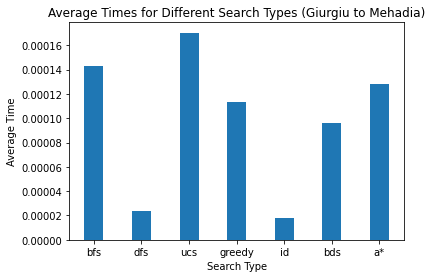

In [65]:
# on some select paths, we plot the performance (in time) and costs of these search algorithms.

# Arad - Bucharest
import matplotlib.pyplot as plt

path = all_paths[19]
avg_times = avg_data[path]['avg_times']

search_types = list(avg_times.keys())
records = list(avg_times.values())

plt.bar(search_types, records, width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Average Time')
plt.title(f'Average Times for Different Search Types ({path[0]} to {path[1]})')
plt.show()

Perhaps the most marked feature of this plot is how the a* search had more search time than other algorithms such as bi-directional search and iterative deepening. This is something that lingers throughout this notebook; and we believe it's caused by the time complexity of the priority-queue from the 'queue' module we used for this assignment.

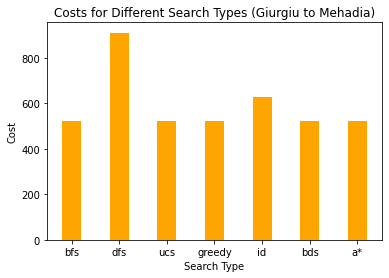

In [66]:
# plotting the costs ... 

path = all_paths[19]
costs = avg_data[path]['costs']

search_types = list(costs.keys())
costs = list(costs.values())

plt.bar(search_types, costs, color='orange', width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Cost')
plt.title(f'Costs for Different Search Types ({path[0]} to {path[1]})')
plt.show()

This is the perfect cost comparison we expect to see. All the algorithms with guaranteed optimality have the least cost recorded on this plot. dfs, though it has the least time on the previous plot, we can see here that it has quickly found a path but that path has the largest cost of all.

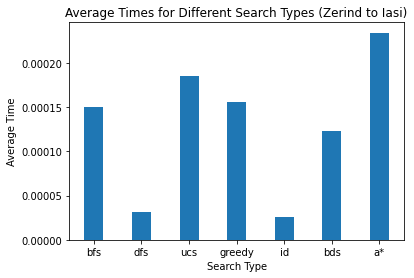

In [67]:
# on some select paths, we plot the performance (in time) and costs of these search algorithms.

path = all_paths[30]
avg_times = avg_data[path]['avg_times']

search_types = list(avg_times.keys())
records = list(avg_times.values())

plt.bar(search_types, records, width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Average Time')
plt.title(f'Average Times for Different Search Types ({path[0]} to {path[1]})')
plt.show()

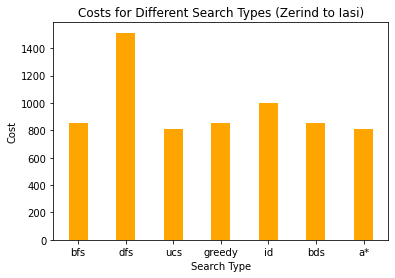

In [68]:
# plotting the costs ... 

path = all_paths[30]
costs = avg_data[path]['costs']

search_types = list(costs.keys())
costs = list(costs.values())

plt.bar(search_types, costs, color='orange', width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Cost')
plt.title(f'Costs for Different Search Types ({path[0]} to {path[1]})')
plt.show()

Again, cost comparisons turn out exactly the same as we'd expect theoretically. with dfs showing the highest cost and optimal algorithms showing the least cost. Non optimal algorithms can show any cost.

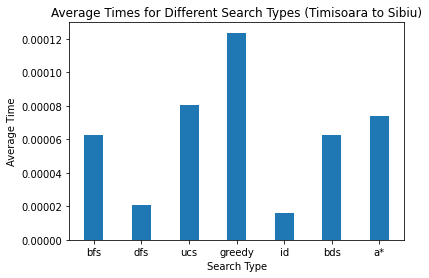

In [69]:
# on some select paths, we plot the performance (in time) and costs of these search algorithms.

path = all_paths[45]
avg_times = avg_data[path]['avg_times']

search_types = list(avg_times.keys())
records = list(avg_times.values())

plt.bar(search_types, records, width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Average Time')
plt.title(f'Average Times for Different Search Types ({path[0]} to {path[1]})')
plt.show()

This is a particularly good example to how greedy search can go wrong. If we look at the map of romania, there two paths from Timisoara to Sibiu. One through Arad and another through Lugoj. Lugoj is slightly geographically closer to Sibiu than Arad so the algorithm chooses to go through Lugoj. But that path changes direction and goes a long way reaching many other cities before arriving at Sibiu. Compared to the path through Arad, this path has a huge traversal time and cost. Unfortunately, that's what the greedy search found. 

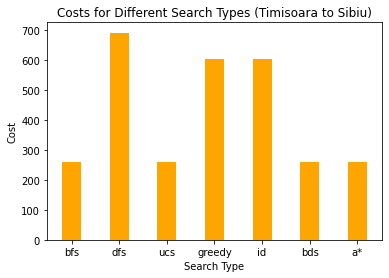

In [70]:
# plotting the costs ... 

path = all_paths[45]
costs = avg_data[path]['costs']

search_types = list(costs.keys())
costs = list(costs.values())

plt.bar(search_types, costs, color='orange', width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Cost')
plt.title(f'Costs for Different Search Types ({path[0]} to {path[1]})')
plt.show()

If we look at the map of Romania, the optimal path and the greedy search path costs compare somewhere near 250 and 590, respectively. We can show this fact on this plot. Looks like there's a path worse than the greedy search path and dfs has managed to find it.

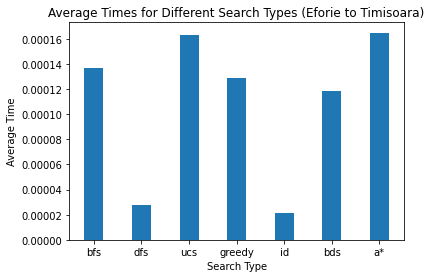

In [71]:
# on some select paths, we plot the performance (in time) and costs of these search algorithms.

path = all_paths[68]
avg_times = avg_data[path]['avg_times']

search_types = list(avg_times.keys())
records = list(avg_times.values())

plt.bar(search_types, records, width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Average Time')
plt.title(f'Average Times for Different Search Types ({path[0]} to {path[1]})')
plt.show()

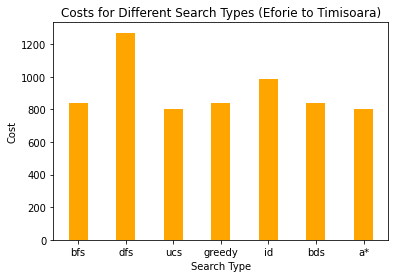

In [72]:
# plotting the costs ... 

path = all_paths[68]
costs = avg_data[path]['costs']

search_types = list(costs.keys())
costs = list(costs.values())

plt.bar(search_types, costs, color='orange', width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Cost')
plt.title(f'Costs for Different Search Types ({path[0]} to {path[1]})')
plt.show()

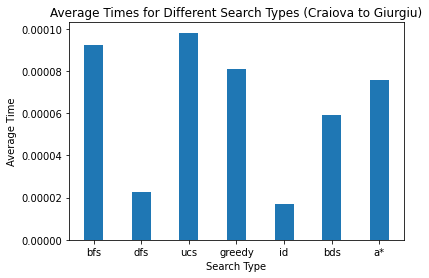

In [73]:
# on some select paths, we plot the performance (in time) and costs of these search algorithms.

path = all_paths[83]
avg_times = avg_data[path]['avg_times']

search_types = list(avg_times.keys())
records = list(avg_times.values())

plt.bar(search_types, records, width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Average Time')
plt.title(f'Average Times for Different Search Types ({path[0]} to {path[1]})')
plt.show()

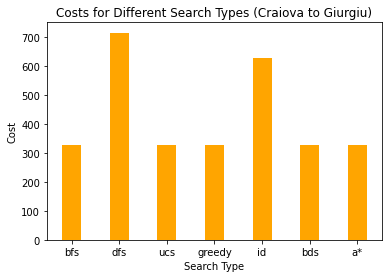

In [74]:
# plotting the costs ... 

path = all_paths[83]
costs = avg_data[path]['costs']

search_types = list(costs.keys())
costs = list(costs.values())

plt.bar(search_types, costs, color='orange', width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Cost')
plt.title(f'Costs for Different Search Types ({path[0]} to {path[1]})')
plt.show()

### Visualization summary

In summary, we see that algorithms that use the priority queue are performing slower than our theoretical expectations. In theory, we assume the priority queue allows for O(1) operations, which is not the case in reality. The cost comparisons almost always give us the expected result. The UCS and A* searches always end up with the lowest cost. BFS, DFS, ID and BDS show a range of costs that seem to vary with each plot

### Part 2 of question 2 (D)

Now we'll be creating random graphs with a number of nodes n = 10, 20, 30, 40.
And randomly connecting nodes with the probability of edges p = 0.2, 0.4, 0.6,
0.8. In total, we will have 16 graphs.

In [75]:
# let's call the list of graphs with 10 nodes ... "graphs_10"

# index 0 corresponds with density 0.2, index 1 with density 0.4, and so on .... 
graphs_10 = [Graph(), Graph(), Graph(), Graph()]
graphs_20 = [Graph(), Graph(), Graph(), Graph()]
graphs_30 = [Graph(), Graph(), Graph(), Graph()]
graphs_40 = [Graph(), Graph(), Graph(), Graph()]


# now let's populate these graphs as instructed in the assignment paper

# populating the graphs with 10 nodes

for index in range(len(graphs_10)):
    currentGraph = graphs_10[index]
    # now let's insert 10 nodes
    for j in range(10):
        currentGraph.addNode(str(j))
    # now let's pick each pair of nodes and create an edge with a probability of 0.2, 0.4, etc
    for k in range(10):
        for l in range(10):
            if k == l: continue
            if random.random() < 0.2 * (index+1):
                currentGraph.addEdge(str(k), str(l), 1)


# populating the graphs with 20 nodes

for index in range(len(graphs_20)):
    currentGraph = graphs_20[index]
    # now let's insert 20 nodes
    for j in range(20):
        currentGraph.addNode(str(j))
    # now let's pick each pair of nodes and create an edge with a probability of 0.2, 0.4, etc
    for k in range(20):
        for l in range(20):
            if k == l: continue
            if random.random() < 0.2 * (index+1):
                currentGraph.addEdge(str(k), str(l), 1)



# populating the graphs with 30 nodes

for index in range(len(graphs_30)):
    currentGraph = graphs_30[index]
    # now let's insert 30 nodes
    for j in range(30):
        currentGraph.addNode(str(j))
    # now let's pick each pair of nodes and create an edge with a probability of 0.2, 0.4, etc
    for k in range(30):
        for l in range(30):
            if k == l: continue
            if random.random() < 0.2 * (index+1):
                currentGraph.addEdge(str(k), str(l), 1)



# populating the graphs with 40 nodes

for index in range(len(graphs_40)):
    currentGraph = graphs_40[index]
    # now let's insert 30 nodes
    for j in range(40):
        currentGraph.addNode(str(j))
    # now let's pick each pair of nodes and create an edge with a probability of 0.2, 0.4, etc
    for k in range(40):
        for l in range(40):
            if k == l: continue
            if random.random() < 0.2 * (index+1):
                currentGraph.addEdge(str(k), str(l), 1)

In [76]:
print(graphs_10[1])

{'0': [('1', 1), ('2', 1), ('4', 1), ('7', 1)], '1': [('2', 1), ('3', 1), ('4', 1), ('6', 1), ('8', 1), ('9', 1)], '2': [('3', 1), ('5', 1), ('8', 1)], '3': [('0', 1), ('5', 1), ('6', 1), ('8', 1)], '4': [('0', 1), ('7', 1), ('8', 1)], '5': [('0', 1), ('4', 1), ('6', 1), ('7', 1), ('8', 1), ('9', 1)], '6': [('1', 1), ('3', 1), ('4', 1), ('7', 1), ('9', 1)], '7': [('0', 1), ('1', 1), ('4', 1), ('8', 1)], '8': [('2', 1), ('3', 1), ('9', 1)], '9': [('2', 1), ('5', 1), ('6', 1), ('8', 1)]}


In [77]:
print(graphs_20[3])

{'0': [('1', 1), ('2', 1), ('3', 1), ('4', 1), ('5', 1), ('6', 1), ('7', 1), ('8', 1), ('9', 1), ('10', 1), ('11', 1), ('12', 1), ('13', 1), ('14', 1), ('16', 1), ('17', 1), ('18', 1), ('19', 1)], '1': [('0', 1), ('3', 1), ('4', 1), ('5', 1), ('6', 1), ('7', 1), ('8', 1), ('11', 1), ('13', 1), ('14', 1), ('15', 1), ('17', 1), ('18', 1), ('19', 1)], '2': [('0', 1), ('3', 1), ('4', 1), ('5', 1), ('7', 1), ('8', 1), ('9', 1), ('10', 1), ('12', 1), ('13', 1), ('15', 1), ('16', 1), ('17', 1), ('18', 1), ('19', 1)], '3': [('0', 1), ('1', 1), ('4', 1), ('5', 1), ('6', 1), ('8', 1), ('9', 1), ('10', 1), ('11', 1), ('12', 1), ('13', 1), ('14', 1), ('15', 1), ('17', 1), ('18', 1), ('19', 1)], '4': [('0', 1), ('1', 1), ('2', 1), ('3', 1), ('5', 1), ('7', 1), ('8', 1), ('9', 1), ('10', 1), ('11', 1), ('12', 1), ('13', 1), ('14', 1), ('15', 1), ('17', 1), ('18', 1), ('19', 1)], '5': [('1', 1), ('2', 1), ('4', 1), ('6', 1), ('7', 1), ('10', 1), ('11', 1), ('12', 1), ('13', 1), ('14', 1), ('15', 1), 

In [78]:
print(graphs_30[3])

{'0': [('2', 1), ('4', 1), ('5', 1), ('6', 1), ('8', 1), ('9', 1), ('12', 1), ('13', 1), ('14', 1), ('15', 1), ('16', 1), ('17', 1), ('18', 1), ('19', 1), ('20', 1), ('22', 1), ('23', 1), ('24', 1), ('26', 1), ('27', 1), ('28', 1), ('29', 1)], '1': [('0', 1), ('2', 1), ('3', 1), ('5', 1), ('6', 1), ('7', 1), ('9', 1), ('11', 1), ('12', 1), ('13', 1), ('15', 1), ('18', 1), ('19', 1), ('20', 1), ('21', 1), ('22', 1), ('23', 1), ('24', 1), ('25', 1), ('27', 1), ('28', 1), ('29', 1)], '2': [('3', 1), ('5', 1), ('8', 1), ('9', 1), ('10', 1), ('11', 1), ('13', 1), ('14', 1), ('15', 1), ('16', 1), ('19', 1), ('20', 1), ('21', 1), ('22', 1), ('23', 1), ('24', 1), ('25', 1), ('26', 1), ('27', 1), ('28', 1), ('29', 1)], '3': [('4', 1), ('5', 1), ('8', 1), ('11', 1), ('13', 1), ('15', 1), ('16', 1), ('17', 1), ('18', 1), ('19', 1), ('20', 1), ('21', 1), ('22', 1), ('23', 1), ('24', 1), ('25', 1), ('26', 1), ('27', 1), ('28', 1), ('29', 1)], '4': [('0', 1), ('2', 1), ('5', 1), ('6', 1), ('7', 1), 

In [79]:
print(graphs_40[1])

{'0': [('2', 1), ('3', 1), ('6', 1), ('8', 1), ('13', 1), ('15', 1), ('17', 1), ('21', 1), ('28', 1), ('34', 1), ('37', 1), ('38', 1)], '1': [('4', 1), ('5', 1), ('9', 1), ('10', 1), ('13', 1), ('15', 1), ('16', 1), ('19', 1), ('20', 1), ('21', 1), ('22', 1), ('27', 1), ('28', 1), ('32', 1), ('33', 1), ('37', 1)], '2': [('0', 1), ('3', 1), ('4', 1), ('6', 1), ('8', 1), ('9', 1), ('10', 1), ('12', 1), ('14', 1), ('17', 1), ('19', 1), ('20', 1), ('21', 1), ('23', 1), ('25', 1), ('26', 1), ('28', 1), ('31', 1), ('33', 1), ('35', 1), ('36', 1), ('38', 1)], '3': [('0', 1), ('4', 1), ('7', 1), ('9', 1), ('13', 1), ('14', 1), ('16', 1), ('23', 1), ('24', 1), ('27', 1), ('28', 1), ('29', 1), ('30', 1), ('31', 1), ('34', 1), ('39', 1)], '4': [('1', 1), ('3', 1), ('5', 1), ('7', 1), ('11', 1), ('18', 1), ('26', 1), ('32', 1), ('34', 1), ('38', 1)], '5': [('0', 1), ('1', 1), ('4', 1), ('10', 1), ('12', 1), ('14', 1), ('17', 1), ('22', 1), ('24', 1), ('27', 1), ('29', 1), ('31', 1), ('32', 1), ('3

### Let's go ahead ...

... and perform 5 repeated searches on 5 different paths between randomly selected nodes for each search algorithm; and of course, record the data.


In [80]:
# let's build the structure to store the experiment data ... 

all_graphs = [graphs_10, graphs_20, graphs_30, graphs_40]

# the experiment data will be store in this dictionary. each key represent a search algorithm
# the associated values will be nested lists of tuples. the inner lists will represents graphs
# with certain number of nodes. the first list for graphs with 10 nodes, the 2nd for graphs with 20 nodes
# and so on. Each tuple will represent experiment data for graphs of that particular number of 
# nodes and different densities. the first tuple in each inner list stands for density 0.2, 
# the second tuple for density 0.4, and so on. Each tuple has 2 numbers in it. The first number
# is the time it took to search the graph, and the 2nd number is the cost of the path discovered 
# by the search. These values will be averages of 5 numbers obtained through repeated experiment.

data = {'bfs': [], 'dfs': [], 'ucs': [],
        'id': [], 'greedy': [], 'a*': [], 'bds': [], }

for key in data.keys():
    for i in range(4):
        data[key].append([])
        for j in range(4):
            data[key][i].append([])


In [81]:
# now let's do the experiments and populate the data.

for index in range(len(all_graphs)):
    for index2 in range(len(all_graphs[index])):
        timeKeeper = {}
        results = {}
        # records will contain lists of (time, cost) values for each algorithm.
        records = {'bfs': [], 'dfs': [], 'ucs': [],
                    'id': [], 'greedy': [], 'a*': [], 'bds': [], }
        for _ in range(5):  # we do five different paths
            # create a path by selecting two random nodes
            path = (getRandomNode(all_graphs[index][index2]),
                    getRandomNode(all_graphs[index][index2]))
            
            for i in range(5):  # this is the experiment loop.
                # we repeat the experiments 5 times and take average times
                # let's do dfs and record the results
                
                with Timer(timeKeeper):
                    results = currentGraph.dfs(path[0], path[1])
                records['dfs'].append(
                    (timeKeeper['interval'], results["cost"]))

                # let's do bfs and record the results
                timeKeeper = {}
                results = {}
                with Timer(timeKeeper):
                    results = currentGraph.bfs(path[0], path[1])
                records['bfs'].append(
                    (timeKeeper['interval'], results["cost"]))

                # let's do ucs and record the results
                timeKeeper = {}
                results = {}
                with Timer(timeKeeper):
                    results = currentGraph.ucs(path[0], path[1])
                records['ucs'].append(
                    (timeKeeper['interval'], results["cost"]))

                # let's do iterative deepening and record the results
                timeKeeper = {}
                results = {}
                with Timer(timeKeeper):
                    results = currentGraph.iterativeDeepeningSearch(
                        path[0], path[1])
                records['id'].append((timeKeeper['interval'], results["cost"]))

                # let's do bi-directional search and record the results
                timeKeeper = {}
                results = {}
                with Timer(timeKeeper):
                    results = currentGraph.bidirectionalSearch(
                        path[0], path[1])
                records['bds'].append(
                    (timeKeeper['interval'], results["cost"]))

                # let's do greedy search and record the results
                timeKeeper = {}
                results = {}
                with Timer(timeKeeper):
                    results = currentGraph.greedySearch(
                        path[0], path[1], heuristic=heuristic.randomDistance)
                records['greedy'].append(
                    (timeKeeper['interval'], results["cost"]))

                # let's do A* search and record the results
                timeKeeper = {}
                results = {}
                with Timer(timeKeeper):
                    results = currentGraph.aStarSearch(
                        path[0], path[1], heuristic=heuristic.randomDistance)
                records['a*'].append((timeKeeper['interval'],
                                     results["cost"]))
        for key in records.keys():
            # let's do averages and save them
            time_sum = 0
            cost_sum = 0
            for record in records[key]:
                time_sum += record[0]
                cost_sum += record[1]
            data[key][index][index2] = (time_sum/len(records['bfs']), cost_sum)   # we're just taking the length one of the lists since all the lists have equal length
            # now we have search times for a particular num_node and density
            # stored in a 3 dimensional data structure with axes: algorithm-type, num-nodes, density
            # index and index2 represent the num_node and density, respectively.


In [82]:
# a sneak peek of the experiment data. this is all the data for one of the algorithm types.
pprint(data['a*'])

[[(0.00018942832946777343, 20),
  (0.00020150184631347655, 30),
  (0.0002099609375, 25),
  (0.00023984909057617188, 40)],
 [(0.00021616935729980468, 30),
  (0.0002298736572265625, 35),
  (0.00020481109619140624, 25),
  (0.00022635459899902343, 35)],
 [(0.00020353317260742186, 25),
  (0.00015221595764160158, 25),
  (0.00021098136901855468, 35),
  (0.00020290374755859374, 35)],
 [(0.00019901275634765626, 25),
  (0.00021169662475585937, 30),
  (0.00022752761840820314, 45),
  (0.00018232345581054688, 20)]]


### Let's try to visualize the data we collected

The plot below helps visualize how the average search time for different graph search algorithms vary with the number of nodes in a graph with an edge density of 0.4.

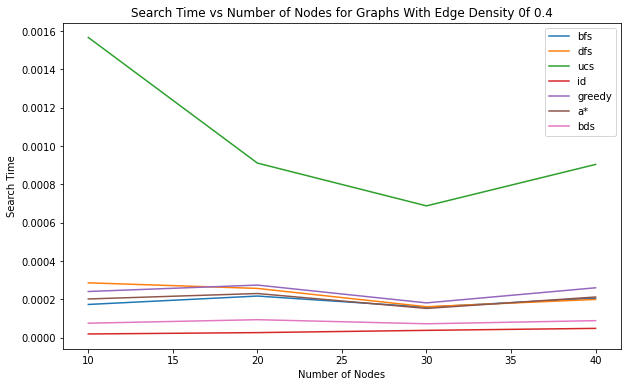

In [83]:
# Extract the data for graphs with 0.4 edge density
edge_density_index = 1
edge_density_data = {algorithm: [time_costs[edge_density_index][0] for time_costs in entry] for algorithm, entry in data.items()}

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the data
x_values = [10, 20, 30, 40]
for algorithm, y_values in edge_density_data.items():
    plt.plot(x_values, y_values, label=algorithm)

# Add labels and a legend
plt.xlabel('Number of Nodes')
plt.ylabel('Search Time')
plt.legend()

plt.title('Search Time vs Number of Nodes for Graphs With Edge Density 0f 0.4')

# Show the plot
plt.show()

It seems like we have too few data points to accurately depict these all the behaviors but we can certainly some important things here. First, we can see how the iterative deepening is consistently performing better across the data points. We think 40 nodes is still too small of the computing power of out PCs and the search tree will still be manageable to do dfs but with varying depths. In this particular situation we assume iterative deepening is performing better than any of the other algorithms. (given that searches that use priority-queues are performing badly due to the priority-queue).

The plot below helps visualize how the average search time for different graph search algorithms varies with the number of nodes in a graph with an edge density of 0.8.

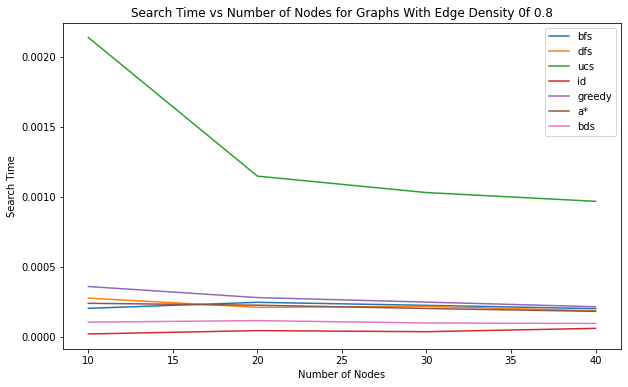

In [84]:
# Extract the data for graphs with 0.8 edge density
edge_density_index = 3
edge_density_data = {algorithm: [time_costs[edge_density_index][0] for time_costs in entry] for algorithm, entry in data.items()}

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the data
x_values = [10, 20, 30, 40]
for algorithm, y_values in edge_density_data.items():
    plt.plot(x_values, y_values, label=algorithm)

# Add labels and a legend
plt.xlabel('Number of Nodes')
plt.ylabel('Search Time')
plt.legend()

plt.title('Search Time vs Number of Nodes for Graphs With Edge Density 0f 0.8')

# Show the plot
plt.show()

Almost identical stuff is going on with the above plot as the previous one. 

#### Now let's see how search time changes with increasing edge density

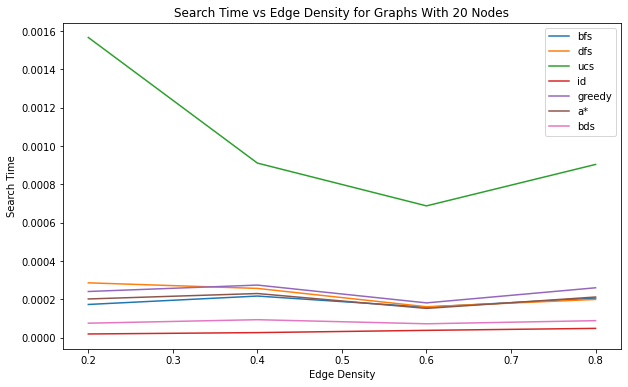

In [85]:
# Extract the data for graphs with 20 nodes
nodes_index = 1
nodes_data = {algorithm: [time_costs[nodes_index][0] for time_costs in entry] for algorithm, entry in data.items()}

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the data
x_values = [0.2, 0.4, 0.6, 0.8]
for algorithm, y_values in nodes_data.items():
    plt.plot(x_values, y_values, label=algorithm)

# Add labels and a legend
plt.xlabel('Edge Density')
plt.ylabel('Search Time')
plt.legend()

plt.title('Search Time vs Edge Density for Graphs With 20 Nodes')

# Show the plot
plt.show()

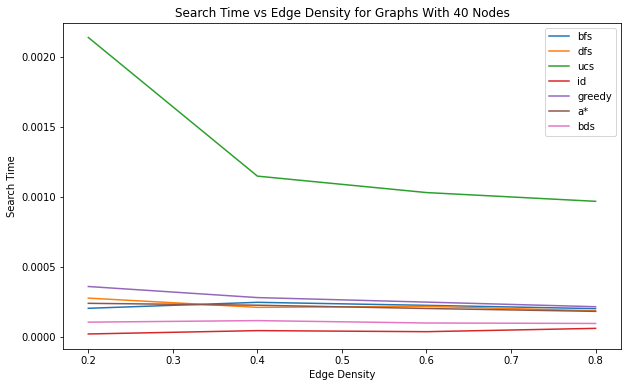

In [86]:
# Extract the data for graphs with 40 nodes
nodes_index = 3
nodes_data = {algorithm: [time_costs[nodes_index][0] for time_costs in entry] for algorithm, entry in data.items()}

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the data
x_values = [0.2, 0.4, 0.6, 0.8]
for algorithm, y_values in nodes_data.items():
    plt.plot(x_values, y_values, label=algorithm)

# Add labels and a legend
plt.xlabel('Edge Density')
plt.ylabel('Search Time')
plt.legend()

plt.title('Search Time vs Edge Density for Graphs With 40 Nodes')

# Show the plot
plt.show()

On these plots, there's a second factor that makes the A* search roughly as slow as ucs; and that is the randomized heuristic function we're using. The purpose of a heuristic function is to give an estimated value for the closeness of a node to the target node. This is expected to provide a sense of "right direction" for the search and lead it to the solution quickly. But using a random heuristic function in these experiments meant that the A* search has no sense of direction at all.

#### Plotting how costs change with increasing number of nodes and edge densities

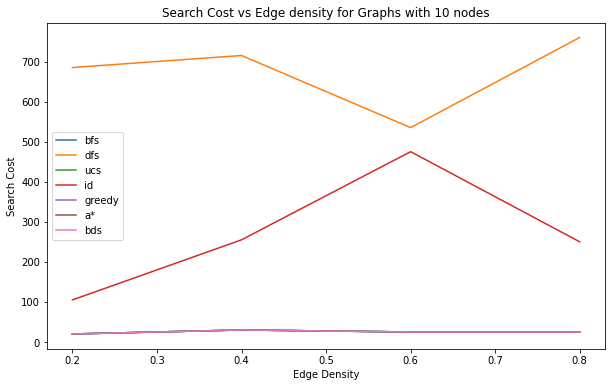

In [87]:
# Extract the data for graphs with 10 nodes
nodes_index = 0
nodes_data = {algorithm: [time_costs[nodes_index][1] for time_costs in entry] for algorithm, entry in data.items()}

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the data
x_values = [0.2, 0.4, 0.6, 0.8]
for algorithm, y_values in nodes_data.items():
    plt.plot(x_values, y_values, label=algorithm)

# Add labels and a legend
plt.xlabel('Edge Density')
plt.ylabel('Search Cost')
plt.legend()

plt.title('Search Cost vs Edge density for Graphs with 10 nodes')

# Show the plot
plt.show()

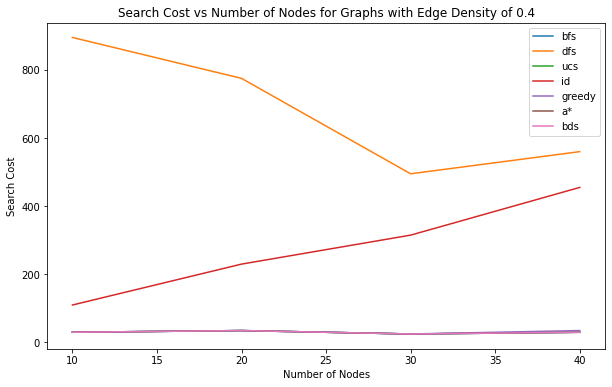

In [88]:
# Extract the data for graphs with 0.4 edge density
edge_density_index = 1
edge_density_data = {algorithm: [time_costs[edge_density_index][1] for time_costs in entry] for algorithm, entry in data.items()}

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the data
x_values = [10, 20, 30, 40]
for algorithm, y_values in edge_density_data.items():
    plt.plot(x_values, y_values, label=algorithm)

# Add labels and a legend
plt.xlabel('Number of Nodes')
plt.ylabel('Search Cost')
plt.legend()

# Add a title
plt.title('Search Cost vs Number of Nodes for Graphs with Edge Density of 0.4')

# Show the plot
plt.show()

We can see on the above plots how dfs and iterative deepening (which uses dfs inside) have protruded costs. This is expected since these algorithms are not optimal. Many of the other algorithms have lines that overlap since they all have found the optimal path.

#### Now let's see how the different algorithms compare with their averaged search times and costs

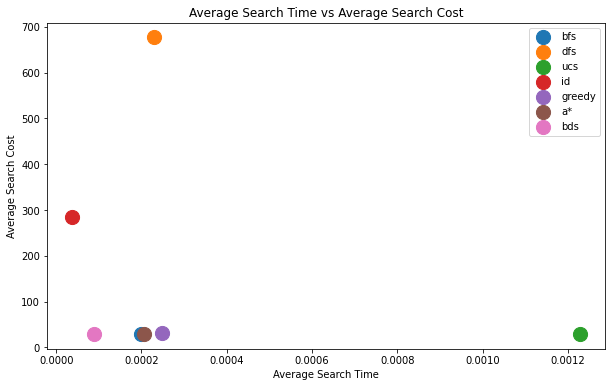

In [89]:
# Calculate the average search time and cost for each algorithm
avg_data = {}
for algorithm, entry in data.items():
    avg_time = __builtins__.sum(time_costs[0] for inner_list in entry for time_costs in inner_list) / len(entry) / len(entry[0])
    avg_cost = __builtins__.sum(time_costs[1] for inner_list in entry for time_costs in inner_list) / len(entry) / len(entry[0])
    avg_data[algorithm] = (avg_time, avg_cost)

# Create a larger figure
plt.figure(figsize=(10, 6))

# Define a list of colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plot the data
for i, (algorithm, (x, y)) in enumerate(avg_data.items()):
    plt.scatter(x, y, color=colors[i % len(colors)], s=200, label=algorithm)

# Add labels to the axes
plt.xlabel('Average Search Time')
plt.ylabel('Average Search Cost')

# Add a title
plt.title('Average Search Time vs Average Search Cost')

# Add a legend
plt.legend()

# Show the plot
plt.show()

This is a scatter plot showing the average search time and average cost for each search algorithm according to the experiment data. The algorithms at the bottom left corner are considered good since they have smaller search time and smaller cost. 

Theoretically speaking, A* search should be at the very bottom left corner. But as we mentioned earlier, the priority-queue and the random heuristic function has made it perform slightly worse than other algorithms which happen to have skewed time and cost values due to the small number of data points we're using. We can generally say that taking the average for 5 experiments was not enough to depict all behaviors accurately, though we can certainly see some behaviors here.

# Question 3 : table containing top-ranked

In [90]:
# laying foundation for data representation 
dataOfCities = {
    'City': [],
    'Degree': [],
    'Closeness': [],
    'Eigenvector': [],
    'Katz': [],
    'PageRank': [],
}

In [91]:

def dataOrganizer(data: map):
    for city in copyGraph.adjacencyList.keys():
        degree = copyGraph.degree(city)
        Closeness = copyGraph.closenessCentrality(city)
        Eigenvector = copyGraph.eigenvalueCentrality(city)
        Katz = copyGraph.katzCentrality(city)
        PageRank = copyGraph.pagerankCentrality(city)

        data["City"].append(city)
        data["Degree"].append(degree)
        data["Closeness"].append(Closeness)
        data["Eigenvector"].append(Eigenvector)
        data["Katz"].append(Katz)
        data["PageRank"].append(PageRank)




In [92]:
# building data for randomly generated nodes 
dataOrganizer(dataOfCities)

In [93]:
#sneak peek of the data 
from pprint import pprint
pprint(dataOfCities)

{'City': ['Oradea',
          'Zerind',
          'Arad',
          'Timisoara',
          'Lugoj',
          'Mehadia',
          'Drobeta',
          'Craiova',
          'Sibiu',
          'Rimnicu Vilcea',
          'Fagaras',
          'Pitesti',
          'Giurgiu',
          'Bucharest',
          'Urziceni',
          'Eforie',
          'Hirsova',
          'Vaslui',
          'Iasi',
          'Neamt'],
 'Closeness': [0.002332433095998036,
               0.002197547999074717,
               0.00255170561375235,
               0.002170436371944254,
               0.0021687022029448695,
               0.002287778446718844,
               0.0024733142410830514,
               0.002938447262604392,
               0.003023070803500398,
               0.003294607248135946,
               0.002819409407924024,
               0.0034289839379173436,
               0.0025679145830517637,
               0.003287766049489531,
               0.002941631831552872,
               0.00198433

In [94]:


def drawTable(centrality: str):
    import pandas as pd
    df = pd.DataFrame(dataOfCities)
    table = df.sort_values(by=centrality, ascending=False)


    styled_table = table.style.set_table_attributes('style="border-collapse: collapse; font-family: Arial; font-size: 17px; \
                                                    margin: 40px; padding: 20px; \
                                                    background-color: white; color: black;"') \
                            .background_gradient(cmap='Reds', subset=[centrality], low=0.4, high=0.9) \
                            .set_table_styles([{
                                                'selector': 'th',
                                                'props': [('background-color', 'white'),
                                                            ('border', '1px solid black'),
                                                            ('padding', '5px'),
                                                            ('text-align', 'center')]}])

    # display table
    display(styled_table)

In [95]:
# table sorted by Degree
drawTable("Degree")

,City,Degree,Closeness,Eigenvector,Katz,PageRank
8,Sibiu,4,0.003023,0.108963,1.543615,0.074406
13,Bucharest,4,0.003288,0.093794,1.530366,0.080577
11,Pitesti,3,0.003429,0.106749,1.438449,0.057165
2,Arad,3,0.002552,0.065389,1.407849,0.060309
14,Urziceni,3,0.002942,0.048050,1.404773,0.069079
7,Craiova,3,0.002938,0.092795,1.414473,0.057365
9,Rimnicu Vilcea,3,0.003295,0.110756,1.439654,0.055997
0,Oradea,2,0.002332,0.054581,1.281253,0.041603
18,Iasi,2,0.001916,0.008344,1.238824,0.055315
17,Vaslui,2,0.002249,0.020246,1.264360,0.050636


In [96]:
## table sorted by Closeness
drawTable("Closeness")

,City,Degree,Closeness,Eigenvector,Katz,PageRank
11,Pitesti,3,0.003429,0.106749,1.438449,0.057165
9,Rimnicu Vilcea,3,0.003295,0.110756,1.439654,0.055997
13,Bucharest,4,0.003288,0.093794,1.530366,0.080577
8,Sibiu,4,0.003023,0.108963,1.543615,0.074406
14,Urziceni,3,0.002942,0.048050,1.404773,0.069079
7,Craiova,3,0.002938,0.092795,1.414473,0.057365
10,Fagaras,2,0.002819,0.072792,1.307398,0.041109
12,Giurgiu,1,0.002568,0.033673,1.153037,0.025011
2,Arad,3,0.002552,0.065389,1.407849,0.060309
6,Drobeta,2,0.002473,0.040976,1.266631,0.043140


In [97]:
# table sorted by Eigenvector
drawTable("Eigenvector")

,City,Degree,Closeness,Eigenvector,Katz,PageRank
9,Rimnicu Vilcea,3,0.003295,0.110756,1.439654,0.055997
8,Sibiu,4,0.003023,0.108963,1.543615,0.074406
11,Pitesti,3,0.003429,0.106749,1.438449,0.057165
13,Bucharest,4,0.003288,0.093794,1.530366,0.080577
7,Craiova,3,0.002938,0.092795,1.414473,0.057365
10,Fagaras,2,0.002819,0.072792,1.307398,0.041109
2,Arad,3,0.002552,0.065389,1.407849,0.060309
0,Oradea,2,0.002332,0.054581,1.281253,0.041603
14,Urziceni,3,0.002942,0.048050,1.404773,0.069079
1,Zerind,2,0.002198,0.043069,1.268910,0.041607


In [98]:
# table sorted by Katz
drawTable("Katz")

,City,Degree,Closeness,Eigenvector,Katz,PageRank
8,Sibiu,4,0.003023,0.108963,1.543615,0.074406
13,Bucharest,4,0.003288,0.093794,1.530366,0.080577
9,Rimnicu Vilcea,3,0.003295,0.110756,1.439654,0.055997
11,Pitesti,3,0.003429,0.106749,1.438449,0.057165
7,Craiova,3,0.002938,0.092795,1.414473,0.057365
2,Arad,3,0.002552,0.065389,1.407849,0.060309
14,Urziceni,3,0.002942,0.048050,1.404773,0.069079
10,Fagaras,2,0.002819,0.072792,1.307398,0.041109
0,Oradea,2,0.002332,0.054581,1.281253,0.041603
1,Zerind,2,0.002198,0.043069,1.268910,0.041607


In [99]:
# table sorted by PageRank
drawTable("PageRank")

,City,Degree,Closeness,Eigenvector,Katz,PageRank
13,Bucharest,4,0.003288,0.093794,1.530366,0.080577
8,Sibiu,4,0.003023,0.108963,1.543615,0.074406
14,Urziceni,3,0.002942,0.048050,1.404773,0.069079
2,Arad,3,0.002552,0.065389,1.407849,0.060309
7,Craiova,3,0.002938,0.092795,1.414473,0.057365
11,Pitesti,3,0.003429,0.106749,1.438449,0.057165
9,Rimnicu Vilcea,3,0.003295,0.110756,1.439654,0.055997
18,Iasi,2,0.001916,0.008344,1.238824,0.055315
16,Hirsova,2,0.002367,0.019802,1.253007,0.051729
17,Vaslui,2,0.002249,0.020246,1.264360,0.050636
